# Задание 1. Проверка данных на полноту

In [2]:
!pip install efficient_apriori

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [4]:
df = pd.read_csv('Case Data.csv', sep=",")
print(df)

                                ﻿id чека      Дата и время  ...   Сумма Кэшбэк
0       0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  ...   126.4    NaN
1       0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  ...  1549.0  154.9
2       0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  ...   135.2    NaN
3       0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  ...    31.2    NaN
4       0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  ...     4.9    NaN
...                                  ...               ...  ...     ...    ...
309702  512a6614980d409a7283410f797fdc3d  09.11.2019 14:21  ...  1071.2    NaN
309703  512a6614980d409a7283410f797fdc3d  09.11.2019 14:21  ...   694.4    NaN
309704  512a6614980d409a7283410f797fdc3d  09.11.2019 14:21  ...  2085.0    NaN
309705  512a6614980d409a7283410f797fdc3d  09.11.2019 14:21  ...  2085.0    NaN
309706  512a6614980d409a7283410f797fdc3d  09.11.2019 14:21  ...   695.0    NaN

[309707 rows x 11 columns]


In [5]:
df.columns

Index(['﻿id чека', 'Дата и время', 'ИНН', 'IDПользователя', 'Товар', 'Бренд',
       'Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк'],
      dtype='object')

In [6]:
df.shape

(309707, 11)

In [7]:
df.isna().sum()
# больше всего пропусков - 'Кэшбэк', 'Бренд', 'Теги'

﻿id чека               0
Дата и время           0
ИНН                    0
IDПользователя         0
Товар                  0
Бренд             178495
Теги              128391
Цена                  52
Кол-во                52
Сумма                 52
Кэшбэк            253552
dtype: int64

In [8]:
# считает все NaN'ы
df.isna().any(axis=1).sum()

259220

In [9]:
# считатет строки с NaN 
rows_nan = df[df.isna().any(axis=1)].shape[0]

In [10]:
# вручную посчитаем процент строк с пропущенными значениями
print(str(rows_nan/df.shape[0] * 100) + '%')

83.69846338636194%


# Задание 2. Поиск ассоциативных правил

In [11]:
# Заполняем NaN-значения
cols = ['Бренд', 'Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк']
df[cols] = df[cols].fillna(df.mode().iloc[0])
# Группируем
df2 = df.groupby('﻿id чека')["Теги"].unique()
df3 = list(map(tuple,df2))
association_rules = apriori(df3, min_support=0.007,
                            min_confidence=0.5) #0.0045(0.0035)
print(association_rules[1]) # печатаем сами правила
print(association_rules[0])
print(len(association_rules))

for item in association_rules:
    pair = item[1]
    print(pair) # lift, support, confidence для одного правила

[{личная гигиена; красота и здоровье; прокладки} -> {упаковка; пакеты; прочее}, {прокладки; личная гигиена; красота и здоровье} -> {упаковка; пакеты; прочее}, {красота и здоровье; гигиена волос; шампунь для волос} -> {упаковка; пакеты; прочее}, {красота и здоровье; дезодорант/антиперсперант; личная гигиена} -> {упаковка; пакеты; прочее}, {продукты; банан; фрукты; овощи/фрукты/ягоды} -> {упаковка; пакеты; прочее}, {бакалея; сахар; продукты} -> {упаковка; пакеты; прочее}, {красота и здоровье; прокладки; личная гигиена} -> {упаковка; пакеты; прочее}, {красота и здоровье; личная гигиена; прокладки} -> {упаковка; пакеты; прочее}, {уход за полостью рта; красота и здоровье; зубная паста} -> {упаковка; пакеты; прочее}, {дезодорант/антиперсперант; личная гигиена; красота и здоровье} -> {упаковка; пакеты; прочее}, {красота и здоровье; шампунь для волос; гигиена волос} -> {упаковка; пакеты; прочее}, {хлеб и сладости; хлеб; продукты} -> {упаковка; пакеты; прочее}, {уход за полостью рта; зубная пас

# Задание 3. Найди товары P&G в чеках покупателей

Pampers: 3505
Ariel: 2523
Tide: 1960
Миф: 265
Lenor: 5207
Always: 189232
Tampax: 228
Naturella: 2985
Discreet: 6244
Braun: 3
Venus: 1122
Head&Shoulders: 3658
Pantene: 3848
Herbal Essences: 147
Aussie: 356
Bear Fruits: 0
Fairy: 4266
Mr.Proper: 1936
Oral-B: 1106
Blend-a-Med: 1764
Clearblue: 64
Gillette: 5718
Old Spice: 2315
Safeguard: 1014


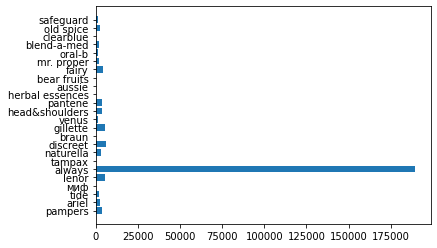

In [12]:
df['Бренд'] = df['Бренд'].str.lower()
df = df.dropna(thresh=2)

# P&G brands: pampers, ariel, tide, миф, lenor, always, tampax, naturella, discreet, braun, gillette, venus, head&shoulders, pantene,
# herbal essences, aussie, bear fruits, fairy, mr. proper (mr.proper), oral-b (oral b), blend-a-med, clearblue, old spice, safeguard

def count_brand(dataset, brand_name, parser):
    found_rows = df['Бренд'].str.contains(parser).sum()
    print(brand_name + ":", "%0.0f" % df['Бренд'].str.contains(parser).sum())
    return found_rows

pampers = count_brand(df, "Pampers", "pampers")
ariel = count_brand(df, "Ariel", "ariel")
tide = count_brand(df, "Tide", "tide")
миф = count_brand(df, "Миф", "миф")
lenor = count_brand(df, "Lenor", "lenor")
always = count_brand(df, "Always", "always")
tampax = count_brand(df, "Tampax", "tampax")
naturella = count_brand(df, "Naturella", "naturella")
discreet = count_brand(df, "Discreet", "discreet")
braun = count_brand(df, "Braun", "braun")
venus = count_brand(df, "Venus", "venus")
head_shoulders = count_brand(df, "Head&Shoulders", "head & shoulders|head&shoulders")
pantene = count_brand(df, "Pantene", "pantene")
herbal_essences = count_brand(df, "Herbal Essences", "herbal essences|herbal")
aussie = count_brand(df, "Aussie", "aussie")
bear_fruits = count_brand(df, "Bear Fruits", "bear fruits")
fairy = count_brand(df, "Fairy", "fairy")
mr_proper = count_brand(df, "Mr.Proper", "mr. proper|mr.proper")
oral_b = count_brand(df, "Oral-B", "oral b|oral-b")
blend_a_med = count_brand(df, "Blend-a-Med", "blend-a-med")
clearblue = count_brand(df, "Clearblue", "clearblue")
gillette = count_brand(df, "Gillette", "gillette")
old_spice = count_brand(df, "Old Spice", "old spice")
safeguard = count_brand(df, "Safeguard", "safeguard")

# График
columns = [pampers, ariel, tide, миф, lenor, always, tampax, naturella,
           discreet, braun, gillette, venus, head_shoulders, pantene, herbal_essences, aussie,
           bear_fruits, fairy, mr_proper, oral_b, blend_a_med, clearblue, old_spice, safeguard]
labels = ('pampers', 'ariel', 'tide', 'миф', 'lenor', 'always', 'tampax', 'naturella',
          'discreet', 'braun', 'gillette', 'venus', 'head&shoulders', 'pantene', 'herbal essences', 'aussie',
          'bear fruits', 'fairy', 'mr. proper', 'oral-b', 'blend-a-med', 'clearblue', 'old spice', 'safeguard')
plt.barh(labels, columns)
plt.show()